__Лабораторная работа 4. Методы стохастической оптимизации. Настройка гиперпараметров.__

__Выполнили: Новицкий Илья, Остриченко Илья, Петров Георгий M3234__

__Метод отжига.__

__Теоретическая часть.__


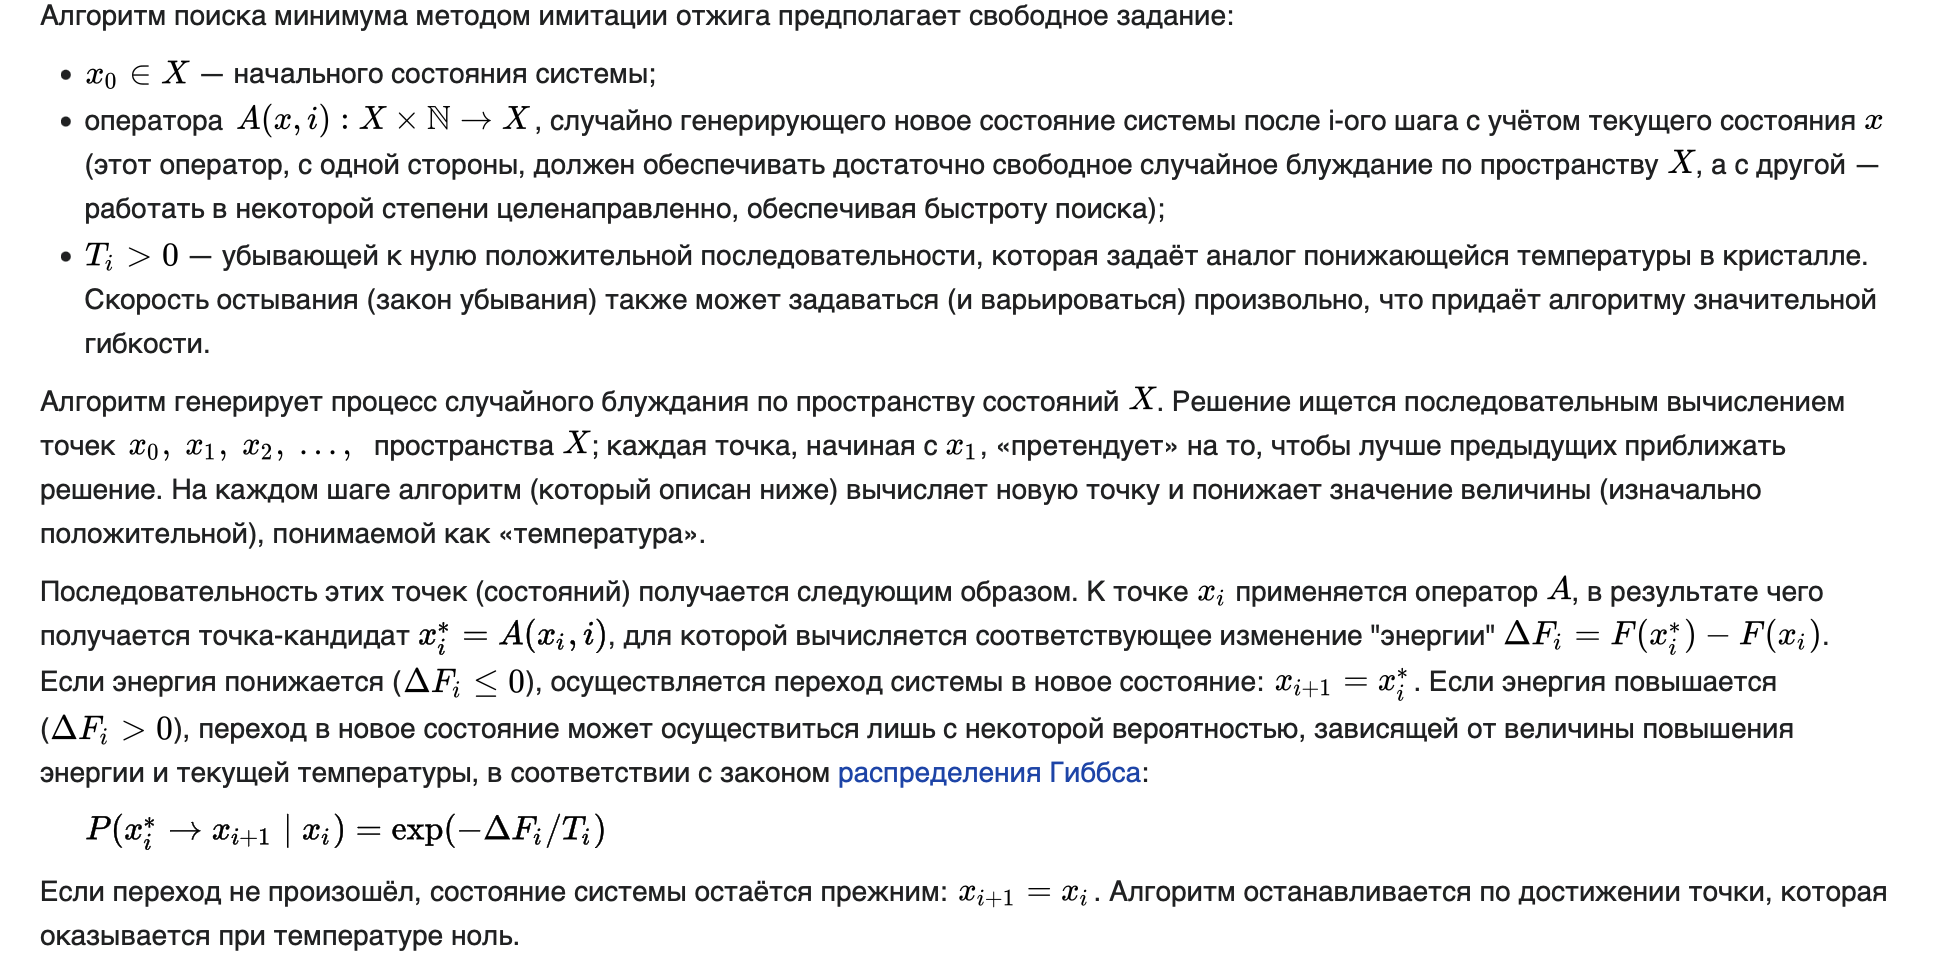

__Практическая часть.__

COOLING SCHEDULE: linear


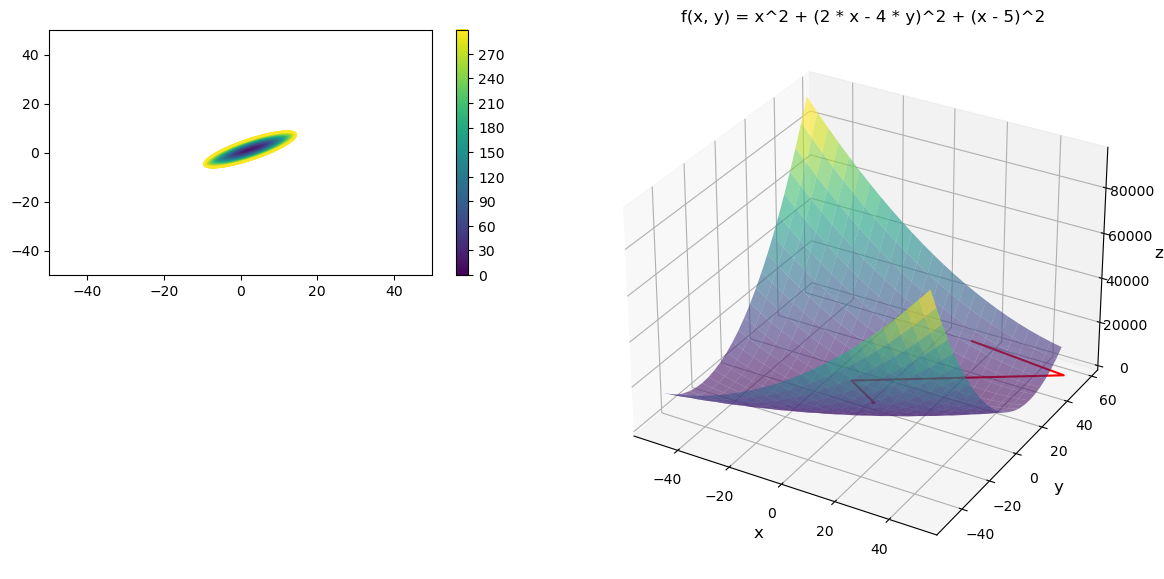

Optimal solution: [  2.45130965   1.17932015 -36.00809922]
Optimal value: 12.539091931924336
Expected oprimal value: 12.5
Call counter: 20004
----------------------------------------------------------------------
Optimal solution: [  2.50619235   1.23993547 -19.6320695 ]
Optimal value: 12.502847958775789
Expected oprimal value: 12.5
Call counter: 20002
----------------------------------------------------------------------
Optimal solution: [2.51940208 1.27008472 1.83717157]
Optimal value: 12.502478014520367
Expected oprimal value: 12.5
Call counter: 20002
----------------------------------------------------------------------
Optimal solution: [2.50222902 1.21223642 4.55546074]
Optimal value: 12.524194026758689
Expected oprimal value: 12.5
Call counter: 20002
----------------------------------------------------------------------


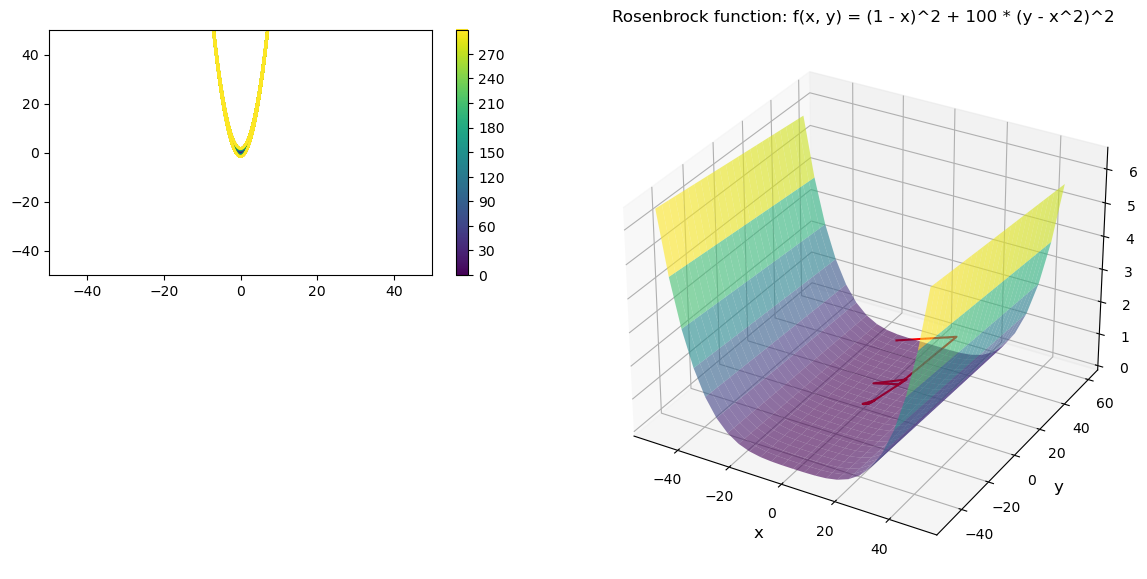

Optimal solution: [ 0.99512284  0.99683776 -5.5902367 ]
Optimal value: 0.004338019073008116
Expected oprimal value: 0
Call counter: 20004
----------------------------------------------------------------------
Optimal solution: [  1.20359514   1.40435332 -70.        ]
Optimal value: 0.23759324121777328
Expected oprimal value: 0
Call counter: 20002
----------------------------------------------------------------------
Optimal solution: [  0.94487347   0.93181987 -54.04282961]
Optimal value: 0.15540417252325767
Expected oprimal value: 0
Call counter: 20002
----------------------------------------------------------------------
Optimal solution: [0.97844102 0.96442145 9.23228147]
Optimal value: 0.005469808505615426
Expected oprimal value: 0
Call counter: 20002
----------------------------------------------------------------------
COOLING SCHEDULE: exponential


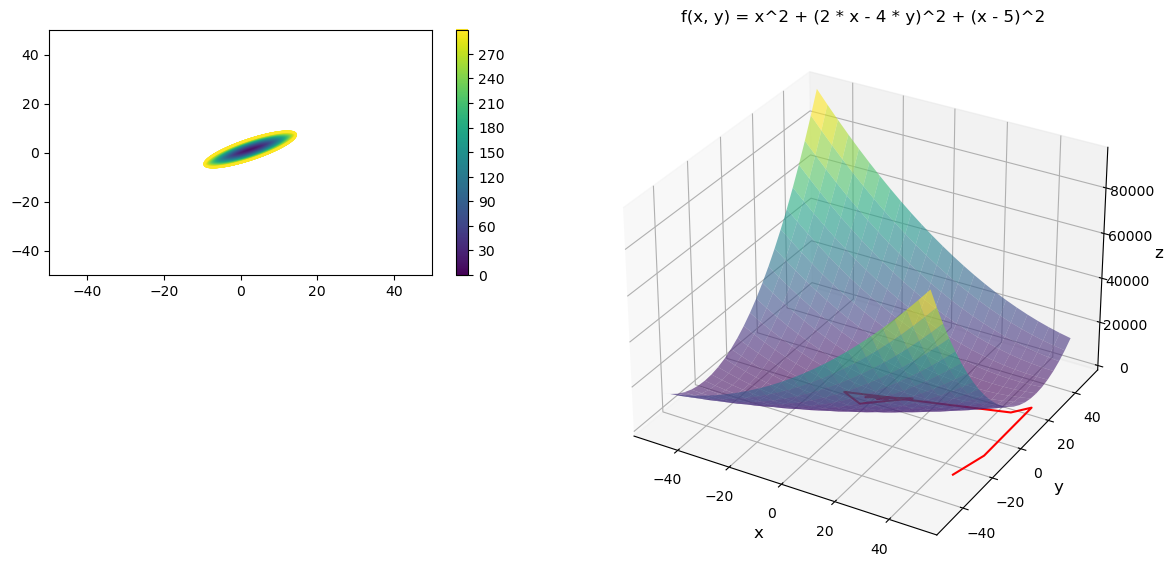

Optimal solution: [  2.50066843   1.25042975 -54.84409507]
Optimal value: 12.500001039621296
Expected oprimal value: 12.5
Call counter: 66004
----------------------------------------------------------------------
Optimal solution: [ 2.50022215  1.25045587 60.90024849]
Optimal value: 12.500002000909753
Expected oprimal value: 12.5
Call counter: 66002
----------------------------------------------------------------------
Optimal solution: [ 2.49969532  1.24980707 26.71770092]
Optimal value: 12.500000212021234
Expected oprimal value: 12.5
Call counter: 66002
----------------------------------------------------------------------
Optimal solution: [ 2.50010295  1.25006122 69.5302254 ]
Optimal value: 12.500000022718378
Expected oprimal value: 12.5
Call counter: 66002
----------------------------------------------------------------------


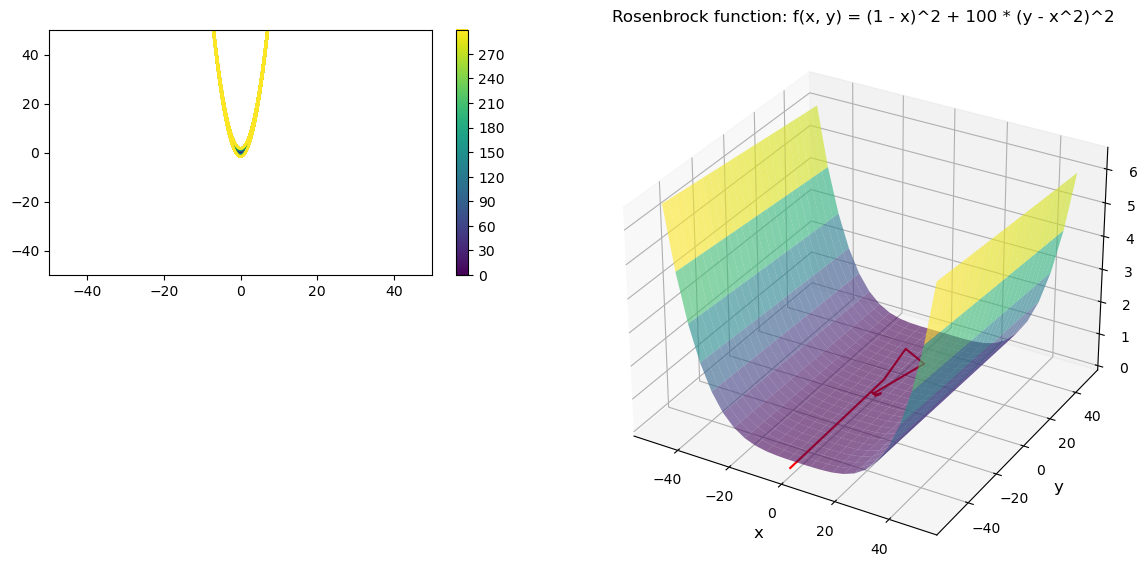

Optimal solution: [  1.00219359   1.00428421 -43.4765178 ]
Optimal value: 5.973443257819005e-06
Expected oprimal value: 0
Call counter: 66004
----------------------------------------------------------------------
Optimal solution: [ 0.99545869  0.99058559 69.36780387]
Optimal value: 3.304240339409703e-05
Expected oprimal value: 0
Call counter: 66002
----------------------------------------------------------------------
Optimal solution: [ 0.99695781  0.99394906 69.98129702]
Optimal value: 9.313353561945309e-06
Expected oprimal value: 0
Call counter: 66002
----------------------------------------------------------------------
Optimal solution: [ 0.99738771  0.99493209 59.95679702]
Optimal value: 9.06968458118702e-06
Expected oprimal value: 0
Call counter: 66002
----------------------------------------------------------------------


In [21]:
import numpy as np
import matplotlib.pyplot as plt

def count_calls(func):
    def wrapper(*args, **kwargs):
        wrapper.calls += 1
        return func(*args, **kwargs)

    wrapper.calls = 0
    return wrapper

@count_calls
def function1(values):
    function1.name = 'f(x, y) = x^2 + (2 * x - 4 * y)^2 + (x - 5)^2'
    function1.minimum = 12.5
    x = values[0]
    y = values[1]
    return x ** 2 + (2 * x - 4 * y) ** 2 + (x - 5) ** 2

@count_calls
def function2(values):
    function2.name = 'Rosenbrock function: f(x, y) = (1 - x)^2 + 100 * (y - x^2)^2'
    function2.minimum = 0
    x = values[0]
    y = values[1]
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2


def visualize(function, points):
    x = np.linspace(-50, 50, 25)
    y = np.linspace(-50, 50, 25)
 
    X, Y = np.meshgrid(x, y)
    Z = function([X, Y])
 
    fig = plt.figure(figsize=(21, 7))
    ax = plt.axes(projection='3d')

    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)
 
    ax.set_title(function.name, fontsize=12)
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.set_zlabel('z', fontsize=12)
    
    ax.plot(points[:, 0], points[:, 1], points[:, 2], color='red', label='Annealing')
        
    ax_contur = fig.add_subplot(231)
    X_contur = np.linspace(-50, 50, 1000)
    Y_contur = np.linspace(-50, 50, 1000)
    X_contur, Y_contur = np.meshgrid(X_contur, Y_contur)
    Z_contur = function([X_contur, Y_contur])
    cp = ax_contur.contour(X_contur, Y_contur, Z_contur, levels=np.arange(0, 300, 1))
    plt.colorbar(cp)
    
    plt.show()

    

def simulated_annealing(function, bounds, visualization = True, cooling_schedule = 'linear'):
    max_temperature = 1
    min_temperature = 0.001
    
    cooling_exp_rate = 0.9
    cooling_linear_rate = 0.05
    
    num_iterations = 1000
    
    current_solution = np.random.uniform(bounds[:, 0], bounds[:, 1])
    current_value = function(current_solution)
    best_solution = current_solution
    best_value = current_value
    current_temperature = max_temperature
    points = [current_solution]
    lb = min(bounds[:, 0])
    ub = max(bounds[:, 1])
    
    while current_temperature > min_temperature:
        for i in range(num_iterations):
            candidate_solution = current_solution + np.random.uniform(lb, ub, len(bounds)) * current_temperature
            candidate_solution = np.clip(candidate_solution, bounds[:, 0], bounds[:, 1])
            candidate_value = function(candidate_solution)

            if candidate_value < current_value or np.random.uniform() < np.exp((current_value - candidate_value) / current_temperature):
                current_solution = candidate_solution
                current_value = candidate_value
                points.append(current_solution)

            if current_value < best_value:
                best_solution = current_solution
                best_value = current_value

        if cooling_schedule == 'linear':
            current_temperature -= cooling_linear_rate * max_temperature
            
        if cooling_schedule == 'exponential':
            current_temperature *= cooling_exp_rate
    
    if visualization:
        visualize(function, np.array(points))
        
    return best_solution

bounds = np.array([(-50, 50), (-60, 60), (-70, 70)])
tests_number = 5

for schedule in ['linear', 'exponential']:
    print('COOLING SCHEDULE: ' + schedule)
    for func in [function1, function2]:
        first_test = True
        for i in range(1, tests_number):
            result = simulated_annealing(func, bounds, first_test, schedule)
            first_test = False
            print("Optimal solution:", result)
            print("Optimal value:", func(result))
            print("Expected oprimal value:", func.minimum)
            print("Call counter:", func.calls)
            print("-"*70)
            func.calls = 0



# __Библиотечный метод отжига__

In [4]:
from scipy.optimize import basinhopping

initial_values = [100, 200, 300]

result = basinhopping(function2, initial_values, minimizer_kwargs={"bounds": bounds})

print("Optimal solution:", result.x)
print("Optimal value:", result.fun)
print("Function called:", function2.calls)
function2.calls = 0

Optimal solution: [ 0.99999974  0.99999944 69.61267847]
Optimal value: 2.7971030609495534e-13
Function called: 9188


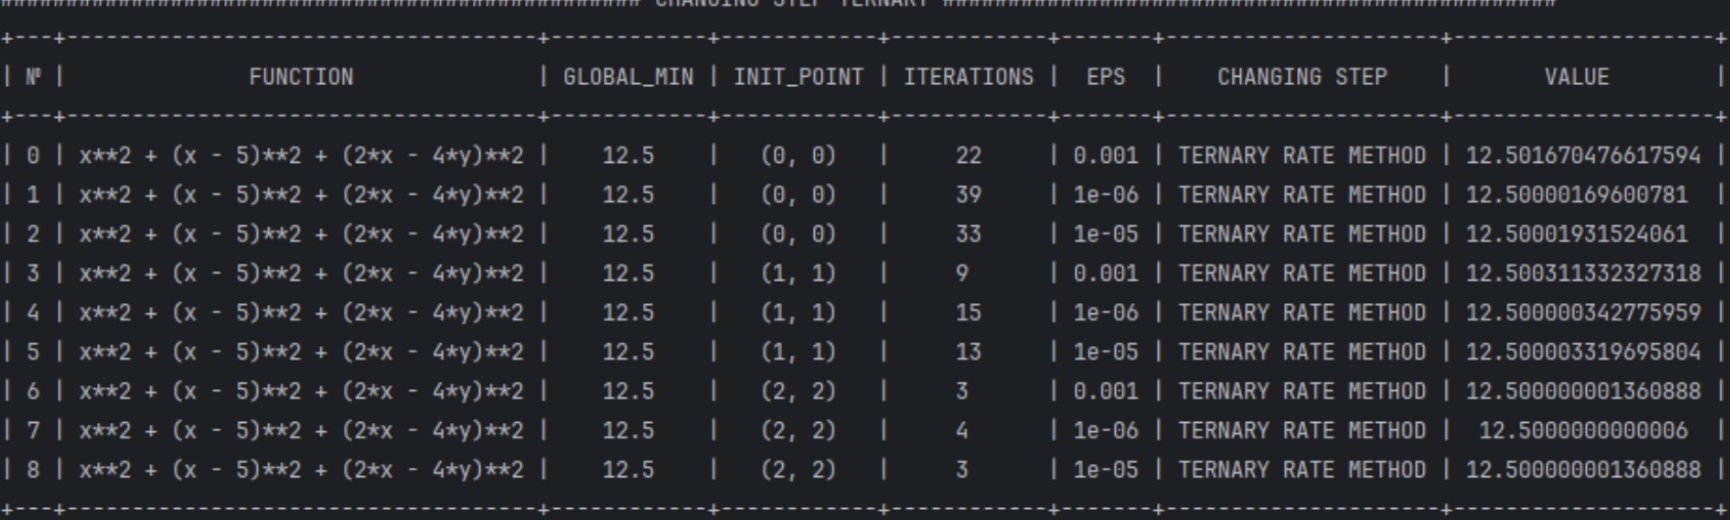

![function1 ternary newton](./images/func1_ternary_newton.png)

![function1 const newton](./images/func1_const_newton.png)

![function1 ternary newton](./images/func2_ternary_newton.png)

![function1 ternary newton](./images/func2_lib_newton.png)

__Подбор параметров:__

Показатель _cooling rate_ сильно сказывается на времени работы метода, поэтому, подбор правильного _cooling schedule_ позволяет ускорить работу программы в разы. Например, для унимодальных функций можно выбрать _exponential cooling rate_,  при котором значение температуры будет подбираться следующим образом: T(k + 1) = a * T(k). Если функция наооборот мультимодальная, _exponential cooling rate_ нам не подойдет(приведет к потери точности, возможно ошибочным результатам), поэтому можно использовать _linear cooling rate_: T(k + 1) = T(k) - a

Также, имея информацию о функции мы можем изменять пороговое значение температуры (критерий остановки), для экономии вычислительных ресурсов.

На эту тему есть отдельные исследования:

Yaghout Nourani and Bjarne Andresen, A comparison of simulated annealing cooling strategies (Journal of Physics A: Mathematical and General Volume 31, Number 41. October 16, 1998) 

![temperature dependency](./images/Temperature%20dependecy.png)

#### __Вывод:__

Метод иммитации отжига - ресурсоемкий, но очень полезный метод для решения задач оптимизации.

Преимущества:
1. Позволяет решать задачу минимизации для мультимодальных функций
2. Благодаря правильной настройке может довольно эффективно работать
3. Не зависит от начальной точки
4. Не требует вычисления производных

Недостатки:
1. Требует точной настройки (подбора параметров)
2. Для унимодальных функций работает сильно медленне, чем ранее изученные методы, основанные на наискорейшем спуске